In [1]:
!pip install opencv-python

In [2]:
pip install opencv-python opencv-python-headless numpy


Note: you may need to restart the kernel to use updated packages.


In [21]:
import cv2
import os
import numpy as np

# Define folder containing images
input_folder = "C:\\Users\\RamCharan\\Downloads\\inpainting\\rgb"
output_folder = r"C:\Users\RamCharan\Downloads\inpainting\mask"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to sharpen image
def sharpen_image(image):
    # Kernel for sharpening
    kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Function to reduce noise (using Gaussian Blur)
def reduce_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to upscale image (e.g., to double the size)
def upscale_image(image, scale_factor=2):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dimensions = (width, height)
    return cv2.resize(image, dimensions, interpolation=cv2.INTER_CUBIC)

# Iterate over all images in the folder
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    if os.path.isfile(file_path) and filename.lower().endswith(('png', 'jpg', 'jpeg', 'jfif')):
        # Read image
        image = cv2.imread(file_path)

        # Enhance the image
        image = reduce_noise(image)  # Reduce noise
        image = sharpen_image(image)  # Sharpen image
        image = upscale_image(image)  # Upscale image

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, image)

print("Images enhanced and saved to:", output_folder)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [23]:
# using opencv

import cv2
import os
import numpy as np

# Define folder containing images
input_folder = "C:\\Users\\RamCharan\\Downloads\\inpainting\\rgb"
output_folder = "C:\\Users\\RamCharan\\Downloads\\inpainting\\mask"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to sharpen image
def sharpen_image(image):
    # Kernel for sharpening
    kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Function to reduce noise (using Gaussian Blur)
def reduce_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to upscale image (e.g., to double the size)
def upscale_image(image, scale_factor=2):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dimensions = (width, height)
    return cv2.resize(image, dimensions, interpolation=cv2.INTER_CUBIC)

# Iterate over all images in the folder
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    if os.path.isfile(file_path) and filename.lower().endswith(('png', 'jpg', 'jpeg', 'jfif')):
        # Read image
        image = cv2.imread(file_path)

        # Check if image is read properly
        if image is None:
            print(f"Failed to load image {filename}. Skipping...")
            continue

        # Enhance the image
        image = reduce_noise(image)  # Reduce noise
        image = sharpen_image(image)  # Sharpen image
        image = upscale_image(image)  # Upscale image

        # Ensure proper output extension (e.g., .jpg or .png)
        output_filename = os.path.splitext(filename)[0] + ".jpg"  # Change to .jpg
        output_path = os.path.join(output_folder, output_filename)

        # Save the enhanced image to the output folder
        success = cv2.imwrite(output_path, image)

        if not success:
            print(f"Failed to save {filename}. Skipping...")

print("Images enhanced and saved to:", output_folder)


Images enhanced and saved to: C:\Users\RamCharan\Downloads\inpainting\mask


In [27]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
# using pillow

from PIL import Image, ImageEnhance
import os

# Directory where the images are stored
input_folder = r"C:\Users\RamCharan\Downloads\enhancement\sadgfh"  # Change this to your folder path
output_folder = r"C:\Users\RamCharan\Downloads\enhancement"  # Folder where enhanced images will be saved

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', 'jfif')):  # Check for image files
        img_path = os.path.join(input_folder, filename)
        
        # Open the image
        with Image.open(img_path) as img:
            # Enhance sharpness
            enhancer = ImageEnhance.Sharpness(img)
            img = enhancer.enhance(2.0)  # Increase sharpness by factor of 2.0
            
            # Enhance contrast
            enhancer = ImageEnhance.Contrast(img)
            img = enhancer.enhance(1.5)  # Increase contrast by 1.5 times
            
            # Enhance brightness
            enhancer = ImageEnhance.Brightness(img)
            img = enhancer.enhance(1.2)  # Increase brightness by 1.2 times
            
            # Enhance color
            enhancer = ImageEnhance.Color(img)
            img = enhancer.enhance(1.3)  # Increase color saturation by 1.3 times

            # Save the enhanced image
            output_path = os.path.join(output_folder, filename)
            img.save(output_path)
            print(f"Enhanced {filename} and saved to {output_path}")


Enhanced document_2024-11-20_16-48-24 (1).mp4_frame75.jpg and saved to C:\Users\RamCharan\Downloads\enhancement\document_2024-11-20_16-48-24 (1).mp4_frame75.jpg
Enhanced download.jfif and saved to C:\Users\RamCharan\Downloads\enhancement\download.jfif


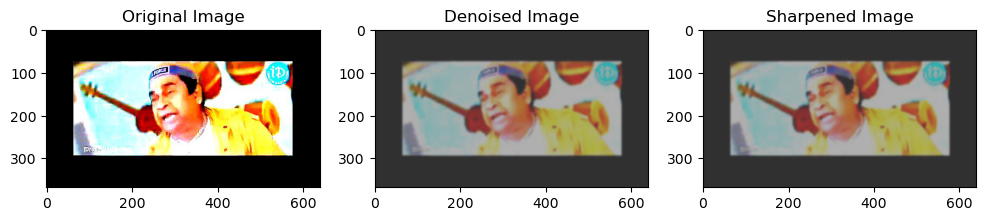

Processed image saved to C:\Users\RamCharan\Downloads\enhancement\sharpened_image_pillow.jpg


In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\RamCharan\Downloads\enhancement\document_2024-11-20_16-48-24 (1).mp4_frame75.jpg"
image = Image.open(image_path).convert("RGB")

# Step 1: Reduce Contrast (normalize intensity)
# Using ImageEnhance to adjust contrast
contrast_enhancer = ImageEnhance.Contrast(image)
normalized = contrast_enhancer.enhance(0.5)  # Lowering contrast (value < 1 reduces contrast)

# Step 2: Reduce Noise (apply Gaussian Blur)
denoised = normalized.filter(ImageFilter.GaussianBlur(radius=2))

# Step 3: Increase Sharpness (apply sharpening filter)
sharpness_enhancer = ImageEnhance.Sharpness(denoised)
sharpened = sharpness_enhancer.enhance(2.0)  # Increase sharpness (value > 1 enhances sharpness)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(denoised), plt.title("Denoised Image")
plt.subplot(1, 3, 3), plt.imshow(sharpened), plt.title("Sharpened Image")
plt.show()

# Save the result
output_path = r"C:\Users\RamCharan\Downloads\enhancement\sharpened_image_pillow.jpg"
sharpened.save(output_path)
print(f"Processed image saved to {output_path}")


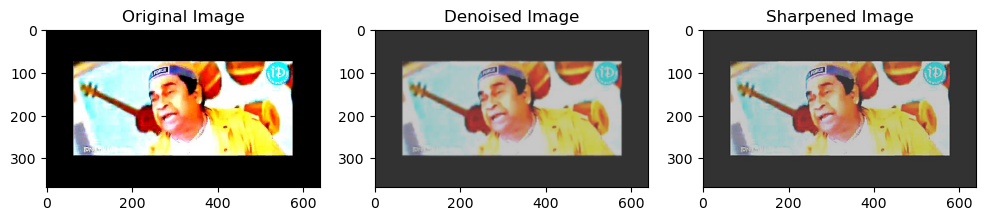

Processed image saved to C:\Users\RamCharan\Downloads\enhancement\sharpened_image.jpg


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\RamCharan\Downloads\enhancement\document_2024-11-20_16-48-24 (1).mp4_frame75.jpg"
image = cv2.imread(image_path)

# Convert to RGB (for display in matplotlib, as OpenCV loads in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Reduce Contrast (normalize intensity)
normalized = cv2.normalize(image, None, alpha=50, beta=200, norm_type=cv2.NORM_MINMAX)

# Step 2: Reduce Noise (apply Gaussian Blur)
denoised = cv2.GaussianBlur(normalized, (5, 5), 0)

# Step 3: Increase Sharpness (apply sharpening kernel)
# Define sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
sharpened = cv2.filter2D(denoised, -1, sharpening_kernel)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image_rgb), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)), plt.title("Denoised Image")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)), plt.title("Sharpened Image")
plt.show()

# Save the result
output_path = r"C:\Users\RamCharan\Downloads\enhancement\sharpened_image.jpg"
cv2.imwrite(output_path, sharpened)
print(f"Processed image saved to {output_path}")


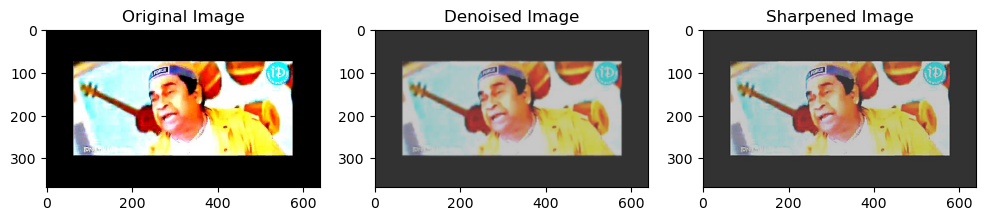

Denoised image saved to C:\Users\RamCharan\Downloads\enhancement\denoised_image.jpg
Sharpened image saved to C:\Users\RamCharan\Downloads\enhancement\sharpened_image.jpg


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\RamCharan\Downloads\enhancement\document_2024-11-20_16-48-24 (1).mp4_frame75.jpg"
image = cv2.imread(image_path)

# Convert to RGB (for display in matplotlib, as OpenCV loads in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Reduce Contrast (normalize intensity)
normalized = cv2.normalize(image, None, alpha=50, beta=200, norm_type=cv2.NORM_MINMAX)

# Step 2: Reduce Noise (apply Gaussian Blur)
denoised = cv2.GaussianBlur(normalized, (5, 5), 0)

# Step 3: Increase Sharpness (apply sharpening kernel)
# Define sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
sharpened = cv2.filter2D(denoised, -1, sharpening_kernel)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image_rgb), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)), plt.title("Denoised Image")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)), plt.title("Sharpened Image")
plt.show()

# Save the denoised image
denoised_path = r"C:\Users\RamCharan\Downloads\enhancement\denoised_image.jpg"
cv2.imwrite(denoised_path, denoised)

# Save the sharpened image
sharpened_path = r"C:\Users\RamCharan\Downloads\enhancement\sharpened_image.jpg"
cv2.imwrite(sharpened_path, sharpened)

print(f"Denoised image saved to {denoised_path}")
print(f"Sharpened image saved to {sharpened_path}")


In [11]:
from PIL import Image, ImageEnhance, ImageFilter

# Load the image
image = Image.open(r"C:\Users\RamCharan\Downloads\enhancement\denoised_image.jpg")

# Enhance sharpness
sharpness_enhancer = ImageEnhance.Sharpness(image)
image = sharpness_enhancer.enhance(2.0)

# Enhance brightness
brightness_enhancer = ImageEnhance.Brightness(image)
image = brightness_enhancer.enhance(1.2)

# Enhance contrast
contrast_enhancer = ImageEnhance.Contrast(image)
image = contrast_enhancer.enhance(1.5)

# Enhance color
color_enhancer = ImageEnhance.Color(image)
image = color_enhancer.enhance(1.3)

# Apply smoothing filter
image = image.filter(ImageFilter.SMOOTH)

# Save the image
image.save(r"C:\Users\RamCharan\Downloads\enhancement\enhanced_image.jpg")
image.show()


In [13]:
from PIL import Image, ImageEnhance, ImageFilter

# Load the image
image = Image.open(r"C:\Users\RamCharan\Downloads\enhancement\denoised_image.jpg")

# Fine-tuned enhancements
sharpness_enhancer = ImageEnhance.Sharpness(image)
image = sharpness_enhancer.enhance(1.5)  # Reduced from 2.0 for less sharpness

brightness_enhancer = ImageEnhance.Brightness(image)
image = brightness_enhancer.enhance(1.1)  # Slightly brighter than original

contrast_enhancer = ImageEnhance.Contrast(image)
image = contrast_enhancer.enhance(1.4)  # Reduced contrast for a softer look

color_enhancer = ImageEnhance.Color(image)
image = color_enhancer.enhance(1.2)  # Slightly toned-down saturation

# Apply smoothing filter (optional)
image = image.filter(ImageFilter.SMOOTH_MORE)  # Subtle smoothing

# Save the image
image.save(r"C:\Users\RamCharan\Downloads\enhancement\enhanced_image.jpg")
image.show()
